WIND ENERGY

THE SKY'S THE LIMIT

Alex Sloan

January 31, 2020

THINK OF THIS AN PART OF ENERGY 101

In [56]:
# Source:
    # http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

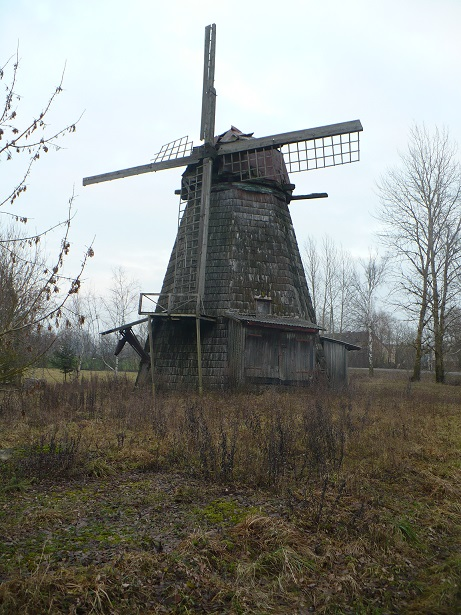

In [57]:
from IPython.display import Image
#Image(filename='test.png') 
Image('https://raw.githubusercontent.com/AlexBB999/WIND/master/xoldpaint.jpg')

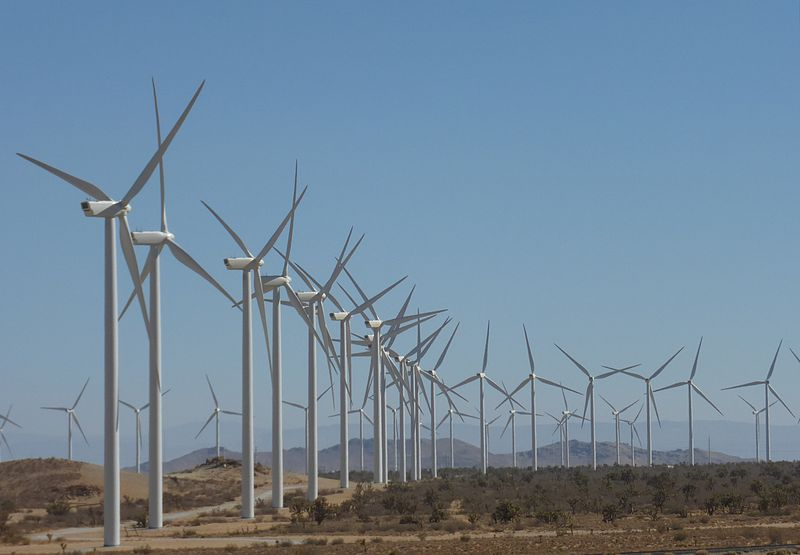

In [58]:
from IPython.display import Image
#Image(filename='test.png') 
Image('https://raw.githubusercontent.com/AlexBB999/WIND/master/old-windmill-1.jpg')
Image('https://raw.githubusercontent.com/AlexBB999/Thinkful/master/windfarm.jpg')


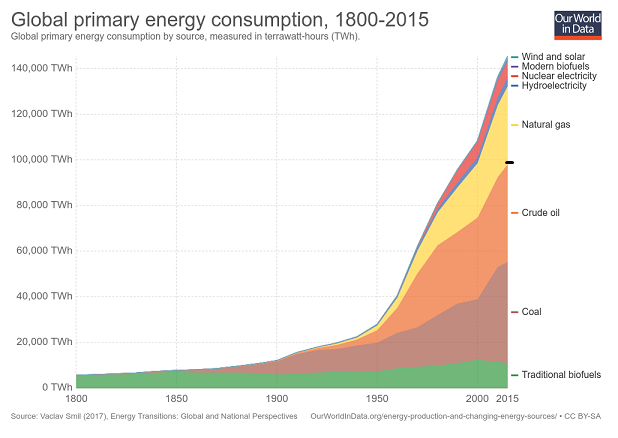

In [59]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/AlexBB999/WIND/master/global-primaryconsumption.png')

excuse me if i wax  philosophical
life is all about energyfood gives you energy


Renewable energy has become critical to our planet. Just think of CO2 emissions and depletion of non-renewable energy sources like oil.

It’s estimated that by 2050 Solar & Wind energy may supply up to 2/3 of the world’s energy needs. 

Wind energy “will surge from today’s 7% to 26% in thirty years

From an economic perspective, wind power...estimated investments of over 5 trillion dollars..

 This project focuses on a small but significant feature of the Wind Energy Universe.

https://www.enelgreenpower.com/media/news/d/2019/07/bloomberg-new-energy-outlook-2019

It will be of special interest to individuals considering an investment in a wind farm and communities considering establishing their own wind farm 

THE PRIMARY METRIC FOR ANY ENERGY SOURCE -- WIND, SOLAR, HYDROELECTRIC, COAL ETC. IS ITS ENERGY CONVERSION EFFICIENCY

FOR WIND ENERGY THIS IS DEFINED AS THE **MEAN CAPACITY FACTOR**

WHAT PERCENT OF THE MAXIMUM POWER RATING FOR EACH TURBINE THAT IS ACTUALLY REALIZED?

WE KNOW IT CAN NEVER BE 100% BECAUSE WIND IS INTERMITENT  -- IN BOTH INTENSITY AND DURATION

THIS IS MY PRIMARY DATA SOURCE

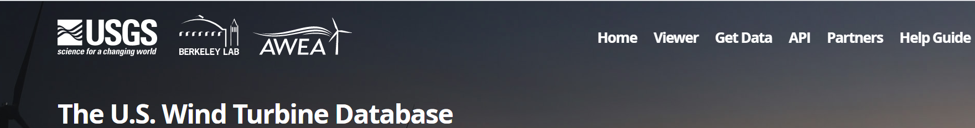

In [61]:
Image('https://raw.githubusercontent.com/AlexBB999/WIND/master/USGS7.png')

They maintain detailed information on every wind turbine in the USA + Guam+ Puerto Rico – all **60,577** of them. 

Data includes GPS coordinates, turbine max capacity, date installed, turbine manu., height etc.

The only thing missing is the mean capacity factor for each turbine.

FOR THIS PROJECT I WILL RANDOMLY SELECT 60 WIND TURBINES

30 IN NORTHEN CALIFORNIA -- 30 IN SOUTHERN CALIFORNIA

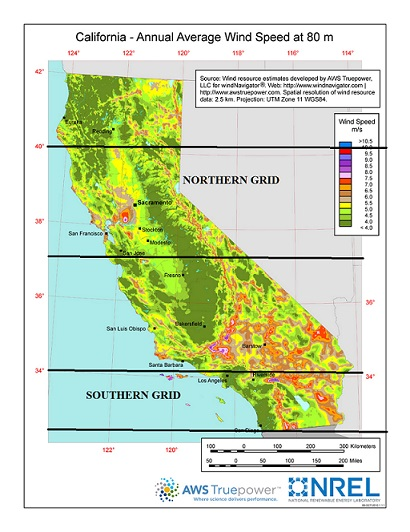

In [62]:
Image('https://raw.githubusercontent.com/AlexBB999/WIND/master/cali_windspeeds.jpg')

I WILL THEN COMPUTE THE MEAN CAPACITY FACTOR FOR EACH TURBINE

My hypothesis is that there is a statistically significant difference between mean aggregate capacity factor for the northern turbines and the mean aggregate capacity factor for the southern turbines. 

The null, of course, being that there is no difference.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ks_2samp
import seaborn as sns
import random

In [ ]:
READ THE USGS WIND TURBINE DATASET THAT IDENTIFIES EVERY WIND TURBINE IN THE USA + PUERTO RICO + GUAM


In [4]:
wind=pd.read_csv('https://raw.githubusercontent.com/AlexBB999/Thinkful/master/wind_data.csv')

In [ ]:
TAKE A CLOSER LOOK AT OUR DATA

In [5]:
 wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60576 entries, 0 to 60575
Data columns (total 24 columns):
case_id       60576 non-null int64
faa_ors       53368 non-null object
faa_asn       53697 non-null object
usgs_pr_id    41397 non-null float64
t_state       60576 non-null object
t_county      60576 non-null object
t_fips        60576 non-null int64
p_name        60576 non-null object
p_year        60330 non-null float64
p_tnum        60576 non-null int64
p_cap         56530 non-null float64
t_manu        56366 non-null object
t_model       56227 non-null object
t_cap         56531 non-null float64
t_hh          54477 non-null float64
t_rd          55408 non-null float64
t_rsa         55408 non-null float64
t_ttlh        54477 non-null float64
t_conf_atr    60576 non-null int64
t_conf_loc    60576 non-null int64
t_img_date    38467 non-null object
t_img_srce    60576 non-null object
xlong         60576 non-null float64
ylat          60576 non-null float64
dtypes: float64(10), i

WE HAVE 60,576 ENTRIES AND 24 ATTRIBUTES


DROP 9 COLUMNS NOT RELEVANT TO THIS PROJECT

ADD "MEAN CAPACITY FACTOR COLUMN" -- A NUMBER I WILL CALCULATE

In [6]:
wind.drop(wind.columns[[1,2,3,16,17,18,19,20,21]],axis=1,inplace=True)
wind['Mean Capacity Factor']=0.0

wind.shape

In [ ]:
RENAMES COLUMNS SO HUMANS CAN READ THEM

In [8]:
wind.columns=['CaseID','State','County','LocationID','Project Name', 'Year Built','Number of Turbines',"Max Project Capacity",'Turbine Manufacturer','Turbine Model','Max Turbine Capacity','Tower Hub Height','Rotor Diameter','Longitude','Latitude','Mean Capacity Factor']

In [ ]:
wind.head()

CREATING PANDAS SUBSET  --  ONLY TURBINES IN CALIFORNIA ---COUNT IS  **8119**

In [10]:
wind_cali=wind[wind['State']=='CA']

wind_cali.shape

In [12]:
wind_cali = wind_cali.dropna(subset=['Max Turbine Capacity'])

DROP ROWS WHERE  --> t_CAP=NaN

NO ENTRY FOR MAX CAPACITY

Database reduced to 6,075 Turbines

In [ ]:
wind_cali.head(2)

MINIMUM LATITUDE FOR CALIFORNIA WIND TURBINES is 32.701486 Degrees North

In [14]:
wind_cali['Latitude'].min()

32.701496

MAXIMUM LATITUDE FOR CALIFORNIA WIND TURBINES is 40.914696 Degrees North

In [15]:
wind_cali['Latitude'].max()

40.914696

/////////////////////////////////////////////////////////////////////////////////////////////

**SOUTHERN CALIFORNIA**

RANDOMLY SELECT 30 TURBINES BETWEEN LATITUDE 32 AND 34  NORTH --  SOUTHERN CALIFORNI

In [ ]:
RANDOMLY SELECT 30 TURBINES BETWEEN LATITUDE 32 AND 34  NORTH --  SOUTHERN CALIFORNIA

In [16]:
cali_south=wind_cali[(wind_cali['Latitude']>32) & (wind_cali['Latitude']<34)]

In [17]:
cali_south.shape

(2215, 16)

RANDOMLY SELECT TURBINES FROM ABOVE SOUTHERN CALI SUBSET

In [19]:
cs=cali_south.sample(30,random_state=1)

TOTAL POWER CAPACITY FOR ALL SOUTHERN CALIFORNIA TURBINES IS 14,648 MW

In [20]:
cs['Max Turbine Capacity'].sum()

14648.0

COMPUTE MEAN CAPACITY FACTOR FOR EACH TURBINE USING RENEWABLES.NINJA

In [21]:
cs.at[24740,'Mean Capacity Factor']=16.1
cs.at[36806,'Mean Capacity Factor']=21.5
cs.at[36885,'Mean Capacity Factor']=12.7
cs.at[31899,'Mean Capacity Factor']=12.7
cs.at[31928,'Mean Capacity Factor']=12.7
cs.at[771,'Mean Capacity Factor']=10.2
cs.at[31697,'Mean Capacity Factor']=16.1
cs.at[826,'Mean Capacity Factor']=9.23
cs.at[31884,'Mean Capacity Factor']=12.7
cs.at[44514,'Mean Capacity Factor']=14.4
cs.at[44431,'Mean Capacity Factor']=13.1
cs.at[13638,'Mean Capacity Factor']=17.2
cs.at[33343,'Mean Capacity Factor']=13.2
cs.at[44519,'Mean Capacity Factor']=18.3
cs.at[44428,'Mean Capacity Factor']=14.2
cs.at[55048,'Mean Capacity Factor']=16.2 #assigned section mean  37.7
cs.at[36845,'Mean Capacity Factor']=18.4
cs.at[33408,'Mean Capacity Factor']=14.8
cs.at[35882,'Mean Capacity Factor']=25.6
cs.at[36809,'Mean Capacity Factor']=13.5
cs.at[33402,'Mean Capacity Factor']=13.6
cs.at[44530,'Mean Capacity Factor']=15.9
cs.at[33425,'Mean Capacity Factor']=15.5
cs.at[33301,'Mean Capacity Factor']=17.3
cs.at[33399,'Mean Capacity Factor']=16.1
cs.at[44534,'Mean Capacity Factor']=15.9
cs.at[33310,'Mean Capacity Factor']=13.6
cs.at[31894,'Mean Capacity Factor']=13.8
cs.at[52153,'Mean Capacity Factor']=25.9
cs.at[44441,'Mean Capacity Factor']=14.2

DISPLAY DETAILS FOR ALL 30 RANDOMLY SELECTED TURBINES

In [27]:
cs

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
24740,3006356,CA,Riverside County,6065,Karen Avenue Windfarm,2004.0,12,11.700,GE Wind,1.5-70.5,1500.0,56.5,77.0,-116.555290,33.921993,16.10
36806,3067710,CA,Riverside County,6065,Painted Hills,1985.0,169,15.210,Vestas - American Wind Technology Inc.,V17,90.0,NaN,17.0,-116.631630,33.935703,21.50
36885,3067760,CA,Riverside County,6065,Painted Hills,1985.0,59,3.835,Vestas - American Wind Technology Inc.,V15,65.0,NaN,15.0,-116.618141,33.937469,12.70
31899,3002834,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.661087,33.960297,12.70
31928,3003352,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.658691,33.954594,12.70
771,3000119,CA,Riverside County,6065,Alta Mesa 1 and 2,1988.0,115,18.560,Danwin,23_160,160.0,23.0,23.0,-116.660759,33.942959,10.20
31697,3004362,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.658806,33.955647,16.10
826,3008467,CA,Riverside County,6065,Alta Mesa 1 and 2,1988.0,115,18.560,Danwin,23_160,160.0,23.0,23.0,-116.666092,33.945309,9.23
31884,3009485,CA,Riverside County,6065,Mesa Wind Farm,1983.0,460,29.900,Vestas,V15,65.0,22.8,15.3,-116.652290,33.953796,12.70
44514,3008744,CA,Riverside County,6065,San Gorgonio Westwinds II LLC,1999.0,48,33.600,NEG Micon,NM48,700.0,50.0,48.0,-116.588890,33.895195,14.40


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**NORTHERN CALIFORNIA**



RANDOMLY SELECT 30 TURBINES BETWEEN LATITUDE 37 AND 40.92     --   NORTHERN CALIFORNIA

In [23]:
cali_north=wind_cali[(wind_cali['Latitude']>37) & (wind_cali['Latitude']<40.92)]

In [24]:
cali_north.shape

(1191, 16)

RANDOMLY SELECT 30 TURBINES FROM NORTHERN CALI SUBSET

In [26]:
cn['Max Turbine Capacity'].sum()

41585.0

TOTAL POWER CAPACITY FOR ALL NORTHERN CALIFORNIA TURBINES IS 41,585 MW

In [28]:
cn=cali_north.sample(30,random_state=1)

In [29]:
cn.at[13366,'Mean Capacity Factor']=30.1
cn.at[45928,'Mean Capacity Factor']=39.9
cn.at[23633,'Mean Capacity Factor']=23.2
cn.at[46170,'Mean Capacity Factor']=36.3
cn.at[45958,'Mean Capacity Factor']=40.5
cn.at[33053,'Mean Capacity Factor']=17.8
cn.at[21699,'Mean Capacity Factor']=12.6
cn.at[47069,'Mean Capacity Factor']=39.3
cn.at[33079,'Mean Capacity Factor']=36.4
cn.at[21650,'Mean Capacity Factor']=17.5
cn.at[14250,'Mean Capacity Factor']=34.2
cn.at[21724,'Mean Capacity Factor']=34.4
cn.at[46062,'Mean Capacity Factor']=40.1
cn.at[45984,'Mean Capacity Factor']=40.5
cn.at[46194,'Mean Capacity Factor']=34.5
cn.at[46124,'Mean Capacity Factor']=34.5
cn.at[18066,'Mean Capacity Factor']=31.3  #assigned section mean was 47.8
cn.at[38010,'Mean Capacity Factor']=30.0
cn.at[47087,'Mean Capacity Factor']=14.9
cn.at[47072,'Mean Capacity Factor']=30.4
cn.at[23632,'Mean Capacity Factor']=24.4
cn.at[23625,'Mean Capacity Factor']=24.5
cn.at[23645,'Mean Capacity Factor']=24.5
cn.at[46157,'Mean Capacity Factor']=33.2
cn.at[45966,'Mean Capacity Factor']=40.7
cn.at[18024,'Mean Capacity Factor']=47.9
cn.at[38091,'Mean Capacity Factor']=30.0
cn.at[21686,'Mean Capacity Factor']=35.3
cn.at[18077,'Mean Capacity Factor']=36.1
cn.at[38136,'Mean Capacity Factor']=6.56

DISPLAY DETAILS FOR ALL 30 RANDOMLY SELECTED NORTHERN CAL TURBINE

In [30]:
cn

,CaseID,State,County,LocationID,Project Name,Year Built,Number of Turbines,Max Project Capacity,Turbine Manufacturer,Turbine Model,Max Turbine Capacity,Tower Hub Height,Rotor Diameter,Longitude,Latitude,Mean Capacity Factor
13366,3020543,CA,Alameda County,6001,Diablo Winds,2004.0,31,20.460,Vestas,V47-0.66,660.0,60.0,47.0,-121.625084,37.745895,30.10
45928,3028682,CA,Solano County,6095,Shiloh II,2009.0,33,66.000,REpower,MM92,2000.0,68.5,92.5,-121.840691,38.173996,39.90
23633,3004156,CA,Merced County,6047,International Turbine Research Center,1988.0,161,17.430,NaN,NaN,105.0,NaN,NaN,-121.194290,37.046196,23.20
46170,3016948,CA,Solano County,6095,Shiloh Wind Project,2006.0,76,114.000,GE Wind,GE1.5-77,1500.0,80.0,77.0,-121.827583,38.162395,36.30
45958,3028700,CA,Solano County,6095,Shiloh II,2009.0,42,84.000,REpower,MM92,2000.0,80.0,92.5,-121.769989,38.163994,40.50
33053,3036696,CA,Solano County,6095,Montezuma,2010.0,16,36.800,Siemens,SWT-2.3-93,2300.0,80.0,93.0,-121.792885,38.152195,17.80
21699,3071498,CA,Solano County,6095,High Winds,2003.0,90,162.000,Vestas,V80-1.8,1800.0,60.0,80.0,-121.801735,38.100502,12.60
47069,3025436,CA,Solano County,6095,Solano Wind Project,2007.0,21,63.000,Vestas,V90-3.0,3000.0,80.0,90.0,-121.760490,38.108395,39.30
33079,3040370,CA,Solano County,6095,Montezuma Winds II,2012.0,34,78.200,Siemens,SWT-2.3-93,2300.0,80.0,93.0,-121.809586,38.116894,36.40
21650,3011420,CA,Solano County,6095,High Winds,2003.0,90,162.000,Vestas,V80-1.8,1800.0,60.0,80.0,-121.789688,38.142094,17.50


**STATISTICAL ANALYSIS**

HISTOGRAM OF MEAN CAPACITY FACTOR FOR EACH TURBINE IN NORTHERN CALIFORNIA SELECTION

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 2., 0., 0., 0.,
        0., 0., 0., 1., 3., 0., 0., 0., 0., 0., 0., 4., 1., 0., 0., 1., 4.,
        1., 2., 1., 0., 0., 1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 6.56  ,  7.3868,  8.2136,  9.0404,  9.8672, 10.694 , 11.5208,
        12.3476, 13.1744, 14.0012, 14.828 , 15.6548, 16.4816, 17.3084,
        18.1352, 18.962 , 19.7888, 20.6156, 21.4424, 22.2692, 23.096 ,
        23.9228, 24.7496, 25.5764, 26.4032, 27.23  , 28.0568, 28.8836,
        29.7104, 30.5372, 31.364 , 32.1908, 33.0176, 33.8444, 34.6712,
        35.498 , 36.3248, 37.1516, 37.9784, 38.8052, 39.632 , 40.4588,
        41.2856, 42.1124, 42.9392, 43.766 , 44.5928, 45.4196, 46.2464,
        47.0732, 47.9   ]),
 <a list of 50 Patch objects>)

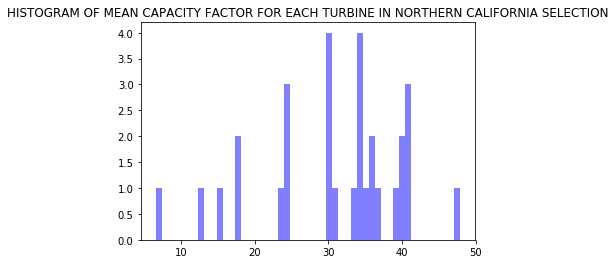

In [31]:
plt.title("HISTOGRAM OF MEAN CAPACITY FACTOR FOR EACH TURBINE IN NORTHERN CALIFORNIA SELECTION")
plt.hist(cn['Mean Capacity Factor'], alpha = .5,color='b',bins=50)

HISTOGRAM OF MEAN CAPACITY FACTOR FOR EACH TURBINE IN SOUTHERN CALIFORNIA SELECTION

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 4., 2., 1., 3., 2., 1., 1.,
        0., 1., 0., 6., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([ 9.23  ,  9.5634,  9.8968, 10.2302, 10.5636, 10.897 , 11.2304,
        11.5638, 11.8972, 12.2306, 12.564 , 12.8974, 13.2308, 13.5642,
        13.8976, 14.231 , 14.5644, 14.8978, 15.2312, 15.5646, 15.898 ,
        16.2314, 16.5648, 16.8982, 17.2316, 17.565 , 17.8984, 18.2318,
        18.5652, 18.8986, 19.232 , 19.5654, 19.8988, 20.2322, 20.5656,
        20.899 , 21.2324, 21.5658, 21.8992, 22.2326, 22.566 , 22.8994,
        23.2328, 23.5662, 23.8996, 24.233 , 24.5664, 24.8998, 25.2332,
        25.5666, 25.9   ]),
 <a list of 50 Patch objects>)

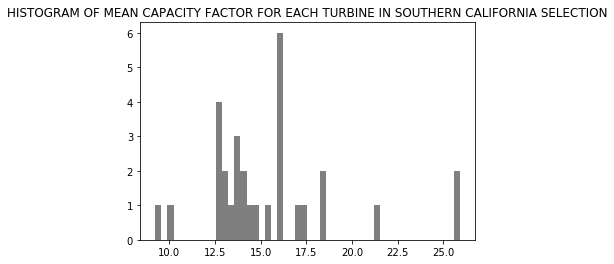

In [32]:
plt.title("HISTOGRAM OF MEAN CAPACITY FACTOR FOR EACH TURBINE IN SOUTHERN CALIFORNIA SELECTION")
plt.hist(cs['Mean Capacity Factor'], alpha = .5,color='k',bins=50)

Based on skew and kurtosis northern California  data is normally distributed

In [33]:
stats.describe(cn['Mean Capacity Factor'])

DescribeResult(nobs=30, minmax=(6.56, 47.9), mean=30.718666666666664, variance=92.5985912643678, skewness=-0.7335575881568349, kurtosis=-0.017503974046578108)

Based on skew and kurtosis southern California data is not normally distributed

In [34]:
stats.describe(cs['Mean Capacity Factor'])

DescribeResult(nobs=30, minmax=(9.23, 25.9), mean=15.487666666666666, variance=13.77373574712644, skewness=1.3051517151406484, kurtosis=1.9536340279259656)

APPLY SHAPIRO-WILKES TEST TO NORTHERN CALIFORNIA MEAN CAPACITY FACTORS -->NORMAL DISTRIBUTION

In [35]:
 stats.shapiro(cn['Mean Capacity Factor'])

(0.9388601183891296, 0.08475355058908463)

APPLY SHAPIRO-WILKES TEST TO SOTHERN  CALIFORNIA MEAN CAPACITY FACTORS  --> NOT NORMAL DISTRIBUTION

In [36]:
stats.shapiro(cs['Mean Capacity Factor'])

(0.8710892200469971, 0.001771549228578806)

SINCE BOTH DATA SETS DO NOT COME FROM NORMAL DISTRIBUTIONS -- APPLY SEVERAL NONPARAMETRIC TESTS 

THE RESULT OF EVERY TEST TELLS US TO REJECT THE NULL

The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.


The Wilcoxon signed-rank test for comparing paired data samples: the nonparametric version of the paired Student t-test.


The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.

Mood's median test is a special case of Pearson's chi-squared test. 

It is a nonparametric test that tests the null hypothesis that the medians of the populations from which two or more samples are drawn are identical.

APPLY KOLMOGOROV–SMIRNOV TEST

In [37]:
ks_2samp(cn['Mean Capacity Factor'],cs['Mean Capacity Factor'])

Ks_2sampResult(statistic=0.7666666666666667, pvalue=1.1088076730719878e-08)

APPLY MOODY'S MEDIAN TEST

In [38]:
from scipy.stats import median_test
stat, p, med, tbl = median_test(cs['Mean Capacity Factor'],cn['Mean Capacity Factor'])

In [ ]:
p

APPLY MANN-WHITNEY U TEST

In [39]:
from scipy.stats import mannwhitneyu
mannwhitneyu(cs['Mean Capacity Factor'],cn['Mean Capacity Factor'])

MannwhitneyuResult(statistic=90.0, pvalue=5.2875930809869225e-08)

NORTHERN CAL

In [40]:
cn_sub=cn[['Max Turbine Capacity','Tower Hub Height','Mean Capacity Factor','Rotor Diameter','Latitude','Longitude']]

SOUTHERN CAL

In [44]:
cs_con_sub=cs_con[['Max Turbine Capacity','Tower Hub Height','Mean Capacity Factor','Rotor Diameter','Latitude','Longitude']]

////////////////////////////////////////////////////////////////////////////////////////////////

==========================================================

CREATE A NEW COLUMN TO AID IN VISUALIZATION

In [41]:
cn_north=cn
#cn_north.drop(['compass='],axis=1,inplace=True)
cn_north['section']='North'
#cn_north.head()
#cn_north.shape
#list(cn_north)

In [42]:
cs_south=cs
cs_south['section']='South'
cs_south.head()
cs_south.shape

(30, 17)

In [43]:
cs_con=cs_south.append(cn_north, sort=False)

GRAPHS

HEAT MAP FOR ALL 60 TURBINES

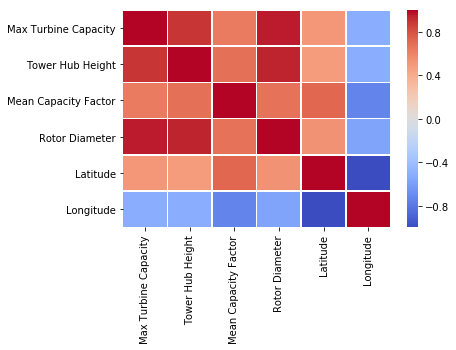

In [47]:
sns.heatmap(cs_con_sub.corr(),linewidth=0.5,cmap='coolwarm')

GRAPH OF MEANS AND 95% CI BEWEEN NORTHERN CAL AND SOUTH CAL MEAN CAPACITY FACTOR

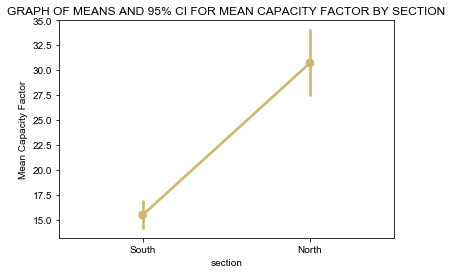

In [48]:
plt.title("GRAPH OF MEANS AND 95% CI FOR MEAN CAPACITY FACTOR BY SECTION")
sns.set(style="darkgrid")
ax = sns.pointplot(x="section", y="Mean Capacity Factor", data=cs_con,color='y')

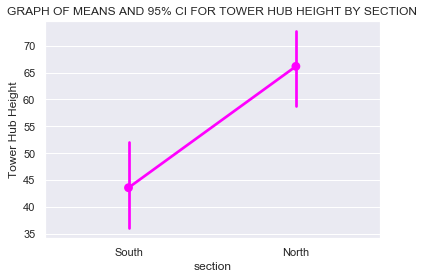

In [49]:
plt.title("GRAPH OF MEANS AND 95% CI FOR TOWER HUB HEIGHT BY SECTION")
sns.set(style="darkgrid")
ax = sns.pointplot(x="section", y="Tower Hub Height", data=cs_con,color='magenta')

GRAPH OF MEANS AND 95% CI BETWEEN NORTH CAL AND SOUTH CAL MAX TURBINE CAPACITY

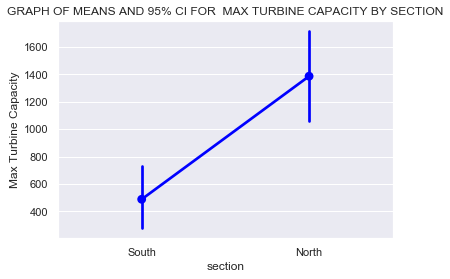

In [50]:
plt.title("GRAPH OF MEANS AND 95% CI FOR  MAX TURBINE CAPACITY BY SECTION")
sns.set(style="darkgrid")
ax = sns.pointplot(x="section", y="Max Turbine Capacity", data=cs_con,color='blue')

GRAPH OF MEANS AND 95% CI BETWEEN NORTH CAL, SOUTH CAL AND  ROTOR DIAMETER

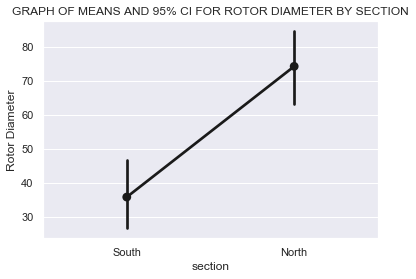

In [51]:
plt.title("GRAPH OF MEANS AND 95% CI FOR ROTOR DIAMETER BY SECTION")
sns.set(style="darkgrid")
ax = sns.pointplot(y="Rotor Diameter", x="section", data=cs_con,color='k')

SCATTERPLOT OF MEAN CAPACITY FACTOR BY SECTION

In [ ]:
sns.catplot(x="section",y="Mean Capacity Factor",data=cs_con)

THE MEAN CAPACITY FACTOR IS PRIMAILY DEPENDENT ON TOWER HUB HEIGHT

THIS TELLS US THAT THE SKY IS THE LIMIT -- HIGHER TOWER HUB HEIGHT MEANS GREATER MEAN CAPACITY FACTOR

THIS IS THE MAIN TAKEAWAY FROM THIS PROJECT

DATABASE METRICS

MAX INDIVIDUAL TURBINE CAPACITY BY YEAR FOR ENTIRE DATABASE

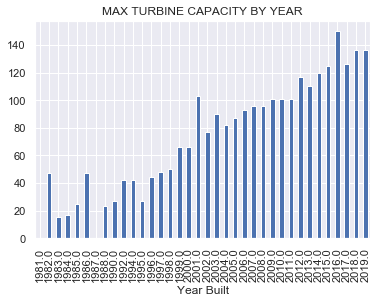

In [52]:
plt.title("MAX TURBINE CAPACITY BY YEAR")
m=wind.groupby("Year Built")['Rotor Diameter'].max()
m.plot.bar()

MAX HUB HEIGHT BY YEAR FOR ENTIRE DATABASE

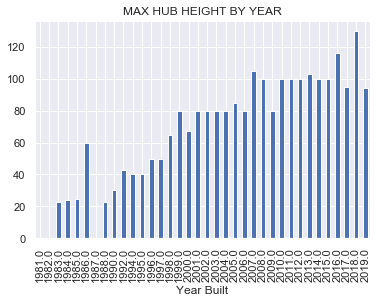

In [53]:
plt.title("MAX HUB HEIGHT BY YEAR")
h=wind.groupby("Year Built")['Tower Hub Height'].max()
h.plot.bar()


HISTOGRAM OF MAX POWER FOR ALL 60,576 TURBINES

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.9290e+03, 4.5400e+02, 6.0000e+00, 8.5000e+01, 3.5100e+02,
        2.5420e+03, 1.1000e+01, 2.2110e+03, 0.0000e+00, 2.0000e+00,
        3.7700e+02, 0.0000e+00, 1.2789e+04, 7.4290e+03, 3.1960e+03,
        1.0760e+03, 7.9250e+03, 2.0750e+03, 5.5860e+03, 1.7890e+03,
        2.6420e+03, 2.4500e+02, 0.0000e+00, 9.6000e+01, 1.2710e+03,
        1.9900e+02, 3.5500e+02, 4.2000e+02, 2.5200e+02, 2.1300e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([  50.,  169.,  288.,  407.,  526.,  645.,  764.,  883., 1002.,
        1121., 1240., 1359., 1478., 1597., 1716., 1835., 1954., 2073.,
        2192., 2311., 2430., 2549., 2668., 2787., 2906., 3025., 3144.,
        3263., 3382., 3501., 3620., 3739., 3858., 3977., 4096., 4215.,
        4334., 4453., 4572., 4691.

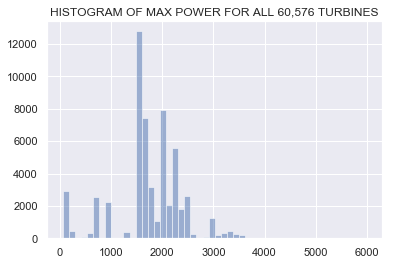

In [54]:
plt.title("HISTOGRAM OF MAX POWER FOR ALL 60,576 TURBINES")
plt.hist(wind['Max Turbine Capacity'], alpha = .5,color='b', bins=50)

WEAKNESSES

WORKING WITH THIS EXTREMELY SMALL SAMPLE SIZE MAY LEAD ONE TO QUESTION THE LEAP FROM SAMPLE TO POPULATION

A SIGNIFICANT IMPROBVEMENT WOULD BE REALIZED IF WE COMPUTED THE MEAN CAPACITY FACTOR FOR ALL 60,507 TURBINES IN THE DATABASE -- THEN WE WOULD NOT NEED TO SAMPLE


CETERIS PARIBUS

QUESTIONS + SOMETHING EXTRA + FINAL COMMENTS

In [55]:
%%HTML
<iframe width='750' height='450' src='https://www.youtube.com/embed/84BeVq2Jm88?feature=player_detailpage' frameborder='0' allowfullscreen<>/iframe>  

    refer to video posted by Mike about 200 years of world history